**PROJECT :** **E-COMMERCE CUSTOMER ANALYSIS**

**SUBMITTED BY - ADITYA SINGH YADAV**

**OBJECTIVES**

1. Appropriate number of clusters using K-means
2. Analyze cluster composition to understand different e-commerce customer segments and their behaviors.
3.Develop actionable insights and recommendations based on the identified customer segments to improve marketing strategies, customer engagement, and overall business performance.

**DATA DESCRIPTION**

**Dataset Shape - (59998, 8)**

**Dataset Size - 5 mb**

**Source - Kaggle(https://www.kaggle.com/code/tyatsenk/k-means-e-commerce-customer#3.-Data-Preprocessing)**






**DATA BIFURCATION**

**Categorical Variables:**

Nominal Categories:

1.Country

2.StockCode

**Ordinal Categories:**

1.InvoiceDate

**Non-Categorical Variables:**

1.Quantity

2.UnitPrice

**Descriptive Statistics: Categorical Variables**

**Count | Frequency Statistics**

1. InvoiceNo:

Count: 59998

Frequency: 675

2. StockCode:

Count: 59998

Frequency: 335

3. Country:

Count: 59998

Frequency: 56112

**Descriptive Statistics: Non-Categorical Variables**

**Measures of Central Tendency**

1. Quantity:

Mean: 8.502967

Median: 2.000000

2. UnitPrice:

Mean: 5.989186

Median: 2.510000

**Measures of Dispersion**

1. Quantity:

Standard Deviation: 56.746866

2. UnitPrice:

Standard Deviation: 152.109427

**DATA PREPROCESSING**

**MISSING DATA STATISTICS AND TREATMENT**

**Missing Data Statistics: Categorical Variables or Features**

1. Description: 161 missing values

2. CustomerID: 21949 missing values

3. CustomerID column has the highest proportion of missing values, accounting for approximately 36.58% of the total rows. Hence, no outliers were removed as missing data was less than 50%

**OBSERVATIONS**

1. The Silhouette score for the 3-cluster model is the highest, being 0.38728, while the Davies-Bouldin score for the same model has the lowest value at 0.87456. These scores suggest better clustering cohesion and separation compared to models with 4 and 5 clusters. Therefore, the analysis suggests that the 3-cluster model might be the most appropriate choice, indicating better cluster quality and separation.

2. Peak Memory: peak memory usage was observed to be 754.09 MB.

3. Wall Time: The wall time reflects the total elapsed time from the start to the end of the task, encompassing all aspects of processing, including CPU execution time, as well as any additional time taken for input/output operations or other external factors. Here, the wall time was measured at 8.34 microseconds (µs).

4. ANOVA Analysis: - The calculated F-statistic was found to be 14.38 and p-value of 0.000149 was obtained. Based on the results of the ANOVA test, we reject the null hypothesis. This p-value is below the conventional significance level of 0.05, indicating strong evidence against the null hypothesis. This concludes that at least one of the means in the dataset is different from the others.

5. Chi-Square Test Analysis - The calculated Chi-square statistic was found to be 1379624.05. The obtained p-value was approximately 7.24e-97, which is exceedingly smaller than the conventional significance level of 0.05. This indicates overwhelming evidence against the null hypothesis.Based on the Chi-square test results, we reject the null hypothesis. The exceptionally low p-value suggests strong evidence of association between the variables under consideration.

**MANAGERIAL IMPLICATIONS**

1. Cluster Analysis: The analysis suggests that the 3-cluster model offers the best cohesion and separation among customer segments compared to models with 4 and 5 clusters. Utilizing this model can help unveil distinct customer groups or behaviors, enabling targeted marketing strategies, personalized services, and tailored product offerings to enhance customer satisfaction and retention.
2. Memory Usage: The peak memory usage of 754.09 MB highlights the computational resource demands. Managers need to ensure adequate memory resources for similar analyses in the future. Exploring optimization techniques or employing memory-efficient algorithms can help mitigate memory constraints and enhance computational efficiency.
3. Wall Time: With a wall time of 8.34 microseconds, the analysis demonstrates efficient computational processing. Managers can use this information to estimate the time required for similar analyses and allocate resources accordingly. Efforts should be made to optimize processes and reduce execution time for enhanced efficiency.
4. ANOVA Analysis: The ANOVA test indicates significant differences in the means of examined variables. Managers should consider these findings when making decisions regarding product development, pricing strategies, or process enhancements. Understanding the factors driving these differences can offer valuable insights for improvement and optimization, leading to enhanced business performance.
5. Chi-Square Test Analysis: The Chi-square test reveals a strong association between the examined variables. Managers should delve into this association to uncover underlying patterns or dependencies. These insights can inform decision-making processes such as resource allocation, market segmentation, or product positioning, ultimately fostering business growth and profitability.


In [96]:
import pandas as pd, numpy as np # For Data Manipulation
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # For Encoding Categorical Data [Nominal | Ordinal]
from sklearn.preprocessing import OneHotEncoder # For Creating Dummy Variables of Categorical Data [Nominal]
from sklearn.impute import SimpleImputer, KNNImputer # For Imputation of Missing Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # For Rescaling Data
from sklearn.model_selection import train_test_split # For Splitting Data into Training & Testing Sets

In [ ]:
df = pd.read_csv('E-commerce-Data-updated_1.csv',encoding='unicode_escape')


In [ ]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# Describe only numerical columns and include frequency statistics
df.describe(include='all')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,59998,59998,59837,59998.000000,59998,59998.000000,38049.000000,59998
unique,2740,2950,2889,NaN,2435,NaN,NaN,24
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,12/6/2010 16:57,NaN,NaN,United Kingdom
freq,675,335,340,NaN,675,NaN,NaN,56112
mean,NaN,NaN,NaN,8.502967,NaN,5.989186,15385.804226,NaN
std,NaN,NaN,NaN,56.746866,NaN,152.109427,1761.735700,NaN
min,NaN,NaN,NaN,-9360.000000,NaN,0.000000,12347.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13983.000000,NaN
50%,NaN,NaN,NaN,2.000000,NaN,2.510000,15366.000000,NaN
75%,NaN,NaN,NaN,8.000000,NaN,4.250000,17017.000000,NaN


In [ ]:
df.shape

(59998, 8)

In [ ]:
df.info() # Dataframe Information (Provide Information on Missing Data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59998 entries, 0 to 59997
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    59998 non-null  object 
 1   StockCode    59998 non-null  object 
 2   Description  59837 non-null  object 
 3   Quantity     59998 non-null  int64  
 4   InvoiceDate  59998 non-null  object 
 5   UnitPrice    59998 non-null  float64
 6   CustomerID   38049 non-null  float64
 7   Country      59998 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.7+ MB


In [ ]:
variable_missing_data = df.isna().sum(); variable_missing_data # Variable-wise Missing Data Information

InvoiceNo          0
StockCode          0
Description      161
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     21949
Country            0
dtype: int64

In [ ]:
record_missing_data = df.isna().sum(axis=1).sort_values(ascending=False).head(5); record_missing_data # Record-wise Missing Data Information (Top 5)

7196     2
1971     2
45394    2
52262    2
39369    2
dtype: int64

In [ ]:
# Data Bifurcation
df_cat = df[[ 'Country','StockCode','InvoiceDate']] # Categorical Data [Nominal | Ordinal]
df_noncat = df[['Quantity', 'UnitPrice']] # Non-Categorical Data


In [ ]:
nan_counts_per_column = df.isnull().sum()

# Calculate the total number of rows
total_rows = len(df)

# Calculate the percentage of missing data in each column
percentage_missing_per_column = (nan_counts_per_column / total_rows) * 100

# Display the percentage of missing data in each column
print(percentage_missing_per_column)

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268342
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     36.582886
Country         0.000000
dtype: float64


In [ ]:
si_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent') # Strategy = median [When Odd Number of Categories Exists]
si_cat_fit = si_cat.fit_transform(df_cat)
df_cat_mdi = pd.DataFrame(si_cat_fit, columns=df_cat.columns); df_cat_mdi # Missing Categorical Data Imputed Subset
df_cat_mdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59998 entries, 0 to 59997
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Country      59998 non-null  object
 1   StockCode    59998 non-null  object
 2   InvoiceDate  59998 non-null  object
dtypes: object(3)
memory usage: 1.4+ MB


In [ ]:
si_noncat = SimpleImputer(missing_values=np.nan, strategy='mean') # Other Strategy : mean | median | most_frequent | constant
si_noncat_fit = si_noncat.fit_transform(df_noncat)
df_noncat_mdi_si = pd.DataFrame(si_noncat_fit, columns=df_noncat.columns); df_noncat_mdi_si # Missing Non-Categorical Data Imputed Subset using Simple Imputer
df_noncat_mdi_si.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59998 entries, 0 to 59997
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Quantity   59998 non-null  float64
 1   UnitPrice  59998 non-null  float64
dtypes: float64(2)
memory usage: 937.6 KB


In [ ]:
# Dataset Used : df_cat_mdi
df_cat_mdi_code = df_cat_mdi.copy()

In [ ]:
'Country','StockCode','InvoiceDate'

('Country', 'StockCode', 'InvoiceDate')

In [ ]:

# Using Pandas (Inferior)
df_cat_mdi_code_pd = df_cat_mdi_code.astype('category')
df_cat_mdi_code_pd['Country_code'] = df_cat_mdi_code_pd['Country'].cat.codes
df_cat_mdi_code_pd['StockCode_code'] = df_cat_mdi_code_pd['StockCode'].cat.codes
df_cat_mdi_code_pd['InvoiceDate_code'] = df_cat_mdi_code_pd['InvoiceDate'].cat.codes
df_cat_mdi_code_pd # (Missing Data Treated) Numeric Coded Categorical Dataset using Pandas

,Country,StockCode,InvoiceDate,Country_code,StockCode_code,InvoiceDate_code
0,United Kingdom,85123A,12/1/2010 8:26,23,2538,767
1,United Kingdom,71053,12/1/2010 8:26,23,1995,767
2,United Kingdom,84406B,12/1/2010 8:26,23,2170,767
3,United Kingdom,84029G,12/1/2010 8:26,23,2128,767
4,United Kingdom,84029E,12/1/2010 8:26,23,2127,767
...,...,...,...,...,...,...
59993,United Kingdom,21027,1/17/2011 17:44,23,282,364
59994,United Kingdom,21033,1/17/2011 17:44,23,287,364
59995,United Kingdom,21041,1/17/2011 17:44,23,293,364
59996,United Kingdom,21043,1/17/2011 17:44,23,295,364


In [ ]:
# Using Pandas (Inferior)
df_cat_mdi_code_pd = df_cat_mdi_code.astype('category')
df_cat_mdi_code_pd['Country_code'] = df_cat_mdi_code_pd['Country'].cat.codes
df_cat_mdi_code_pd['StockCode_code'] = df_cat_mdi_code_pd['StockCode'].cat.codes
df_cat_mdi_code_pd['InvoiceDate_code'] = df_cat_mdi_code_pd['InvoiceDate'].cat.codes

# Keep only encoded columns
encoded_columns = ['Country_code', 'StockCode_code', 'InvoiceDate_code']
df_encoded_only = df_cat_mdi_code_pd[encoded_columns]

print(df_encoded_only)


       Country_code  StockCode_code  InvoiceDate_code
0                23            2538               767
1                23            1995               767
2                23            2170               767
3                23            2128               767
4                23            2127               767
...             ...             ...               ...
59993            23             282               364
59994            23             287               364
59995            23             293               364
59996            23             295               364
59997            23             296               364

[59998 rows x 3 columns]


In [ ]:
# 3.1. Standardization
ss_quantity = StandardScaler()  # StandardScaler for Quantity
ss_unit_price = StandardScaler()  # StandardScaler for UnitPrice

ss_fit_quantity = ss_quantity.fit_transform(df_noncat_mdi_si[['Quantity']])  # Fitting and transforming Quantity
ss_fit_unit_price = ss_unit_price.fit_transform(df_noncat_mdi_si[['UnitPrice']])  # Fitting and transforming UnitPrice

# Creating DataFrame for standardized data
df_quantity_std = pd.DataFrame(ss_fit_quantity, columns=['Quantity_std'])
df_unit_price_std = pd.DataFrame(ss_fit_unit_price, columns=['UnitPrice_std'])

# Joining standardized data with the original DataFrame
df_noncat_mdt_std = df_noncat_mdi_si.join([df_quantity_std, df_unit_price_std])
df_noncat_mdt_std

,Quantity,UnitPrice,Quantity_std,UnitPrice_std
0,6.0,2.55,-0.044108,-0.022610
1,6.0,3.39,-0.044108,-0.017088
2,8.0,2.75,-0.008863,-0.021295
3,6.0,3.39,-0.044108,-0.017088
4,6.0,3.39,-0.044108,-0.017088
...,...,...,...,...
59993,1.0,0.83,-0.132219,-0.033918
59994,17.0,2.46,0.149737,-0.023202
59995,1.0,5.79,-0.132219,-0.001310
59996,2.0,4.13,-0.114597,-0.012223


In [ ]:
# 3.1. Standardization
ss_quantity = StandardScaler()  # StandardScaler for Quantity
ss_unit_price = StandardScaler()  # StandardScaler for UnitPrice

ss_fit_quantity = ss_quantity.fit_transform(df_noncat_mdi_si[['Quantity']])  # Fitting and transforming Quantity
ss_fit_unit_price = ss_unit_price.fit_transform(df_noncat_mdi_si[['UnitPrice']])  # Fitting and transforming UnitPrice

# Creating DataFrame for standardized data
df_quantity_std = pd.DataFrame(ss_fit_quantity, columns=['Quantity_std'])
df_unit_price_std = pd.DataFrame(ss_fit_unit_price, columns=['UnitPrice_std'])

# Joining standardized data with the original DataFrame
df_noncat_mdt_std = pd.concat([df_quantity_std, df_unit_price_std], axis=1)  # Concatenating standardized columns

# Dropping original columns from df_noncat_mdi_si
df_noncat_mdi_si.drop(['Quantity', 'UnitPrice'], axis=1, inplace=True)

# Checking the resulting DataFrame
print(df_noncat_mdt_std)


       Quantity_std  UnitPrice_std
0         -0.044108      -0.022610
1         -0.044108      -0.017088
2         -0.008863      -0.021295
3         -0.044108      -0.017088
4         -0.044108      -0.017088
...             ...            ...
59993     -0.132219      -0.033918
59994      0.149737      -0.023202
59995     -0.132219      -0.001310
59996     -0.114597      -0.012223
59997     -0.096975      -0.028658

[59998 rows x 2 columns]


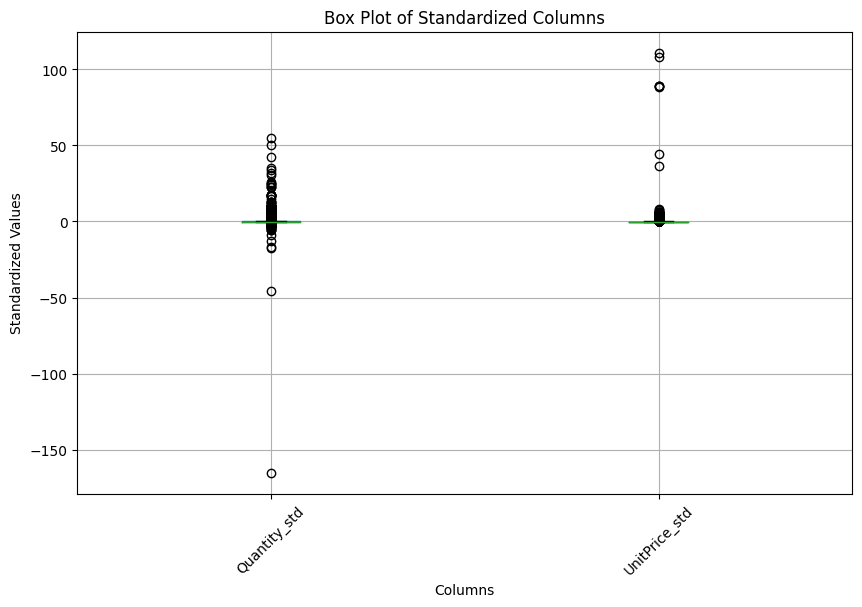

In [ ]:
import matplotlib.pyplot as plt

# Creating box plots for standardized columns
df_noncat_mdt_std.boxplot(figsize=(10, 6))
plt.title('Box Plot of Standardized Columns')
plt.ylabel('Standardized Values')
plt.xlabel('Columns')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.show()


In [ ]:
# Merge df_noncat_mdt_std_no_outliers and df_encoded_only based on common columns
merged_df = pd.merge(df_noncat_mdt_std, df_encoded_only, left_index=True, right_index=True)

# Display the merged DataFrame
merged_df


,Quantity_std,UnitPrice_std,Country_code,StockCode_code,InvoiceDate_code
0,-0.044108,-0.022610,23,2538,767
1,-0.044108,-0.017088,23,1995,767
2,-0.008863,-0.021295,23,2170,767
3,-0.044108,-0.017088,23,2128,767
4,-0.044108,-0.017088,23,2127,767
...,...,...,...,...,...
59993,-0.132219,-0.033918,23,282,364
59994,0.149737,-0.023202,23,287,364
59995,-0.132219,-0.001310,23,293,364
59996,-0.114597,-0.012223,23,295,364


In [ ]:
# Required Libraries

import pandas as pd, numpy as np # For Data Manipulation
import matplotlib.pyplot as plt, seaborn as sns # For Data Visualization
import scipy.cluster.hierarchy as sch # For Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering as agclus, KMeans as kmclus # For Agglomerative & K-Means Clustering
from sklearn.metrics import silhouette_score as sscore, davies_bouldin_score as dbscore # For Clustering Model Evaluation

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

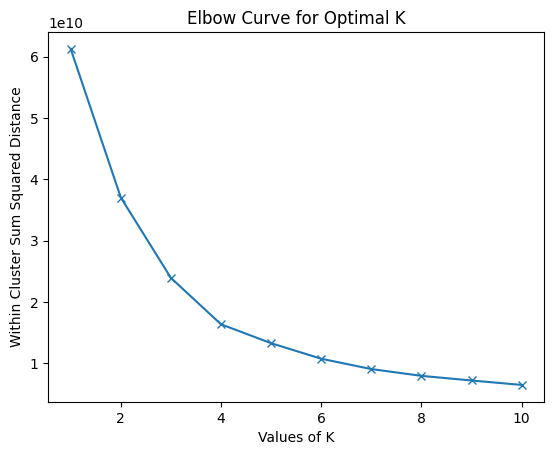

In [ ]:
wcssd = [] # Within-Cluster-Sum-Squared-Distance
nr_clus = range(1,11) # Number of Clusters
for k in nr_clus:
    kmeans = kmclus(n_clusters=k, init='random', random_state=111)
    kmeans.fit(merged_df)
    wcssd.append(kmeans.inertia_)
plt.plot(nr_clus, wcssd, marker='x')
plt.xlabel('Values of K')
plt.ylabel('Within Cluster Sum Squared Distance')
plt.title('Elbow Curve for Optimal K')
plt.show()

In [ ]:
km_3cluster = kmclus(n_clusters=3, init='random', random_state=333)
km_3cluster_model = km_3cluster.fit_predict(merged_df); km_3cluster_model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [ ]:
km_4cluster = kmclus(n_clusters=4, init='random', random_state=333)
km_4cluster_model = km_3cluster.fit_predict(merged_df); km_3cluster_model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [ ]:
km_5cluster = kmclus(n_clusters=5, init='random', random_state=333)
km_5cluster_model = km_5cluster.fit_predict(merged_df); km_5cluster_model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 3, 3, ..., 4, 4, 4], dtype=int32)

In [ ]:
sscore_km_3cluster = sscore(merged_df, km_3cluster_model); sscore_km_3cluster

0.3872825863038311

In [ ]:
sscore_km_4cluster = sscore(merged_df, km_4cluster_model); sscore_km_4cluster

0.3872825863038311

In [ ]:
sscore_km_5cluster = sscore(merged_df, km_5cluster_model); sscore_km_5cluster

0.3805763845791452

In [ ]:
dbscore_km_3cluster = dbscore(merged_df, km_3cluster_model); dbscore_km_3cluster

0.8745690017372661

In [ ]:
dbscore_km_4cluster = dbscore(merged_df, km_4cluster_model); dbscore_km_4cluster

0.8745690017372661

In [ ]:
dbscore_km_5cluster = dbscore(merged_df, km_5cluster_model); dbscore_km_5cluster

0.8695240929207453

In [ ]:
from scipy.stats import f_oneway

# Extracting the columns from the DataFrame
quantity = df_noncat['Quantity']
unit_price = df_noncat['UnitPrice']

# Performing one-way ANOVA
f_statistic, p_value = f_oneway(quantity, unit_price)

# Printing the results
print("ANOVA results:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpretation of p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is significant evidence that at least one of the means is different.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence that the means are different.")


ANOVA results:
F-statistic: 14.384265022794397
p-value: 0.00014911554051757456
Reject the null hypothesis. There is significant evidence that at least one of the means is different.


In [ ]:
from scipy.stats import chi2_contingency

# Extracting the columns from the DataFrame
country = df_cat['Country']
stock_code = df_cat['StockCode']
invoice_date = df_cat['InvoiceDate']

# Performing chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(pd.crosstab(country, [stock_code, invoice_date]))

# Printing the results
print("Chi-square test results:")
print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

# Interpretation of p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is significant evidence of association between the variables.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence of association between the variables.")


Chi-square test results:
Chi-square statistic: 1379624.0531934877
p-value: 7.241145498482171e-97
Degrees of freedom: 1345132
Expected frequencies table:
[[2.08340278e-03 2.08340278e-03 2.08340278e-03 ... 2.08340278e-03
  2.08340278e-03 2.08340278e-03]
 [1.50005000e-04 1.50005000e-04 1.50005000e-04 ... 1.50005000e-04
  1.50005000e-04 1.50005000e-04]
 [3.33344445e-05 3.33344445e-05 3.33344445e-05 ... 3.33344445e-05
  3.33344445e-05 3.33344445e-05]
 ...
 [6.83356112e-04 6.83356112e-04 6.83356112e-04 ... 6.83356112e-04
  6.83356112e-04 6.83356112e-04]
 [8.16693890e-04 8.16693890e-04 8.16693890e-04 ... 8.16693890e-04
  8.16693890e-04 8.16693890e-04]
 [9.35231174e-01 9.35231174e-01 9.35231174e-01 ... 9.35231174e-01
  9.35231174e-01 9.35231174e-01]]
Reject the null hypothesis. There is significant evidence of association between the variables.


In [91]:
!pip install memory_profiler

In [95]:
%memit
%time
wcssd = []  # Within-Cluster-Sum-Squared-Distance
nr_clus = range(1, 11)  # Number of Clusters

for k in nr_clus:
    kmeans = kmclus(n_clusters=k, init='random', random_state=111)
    kmeans.fit(merged_df)
    wcssd.append(kmeans.inertia_)




peak memory: 754.09 MiB, increment: 0.00 MiB
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.34 µs


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8